In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dataset = pd.read_csv('data.csv')
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


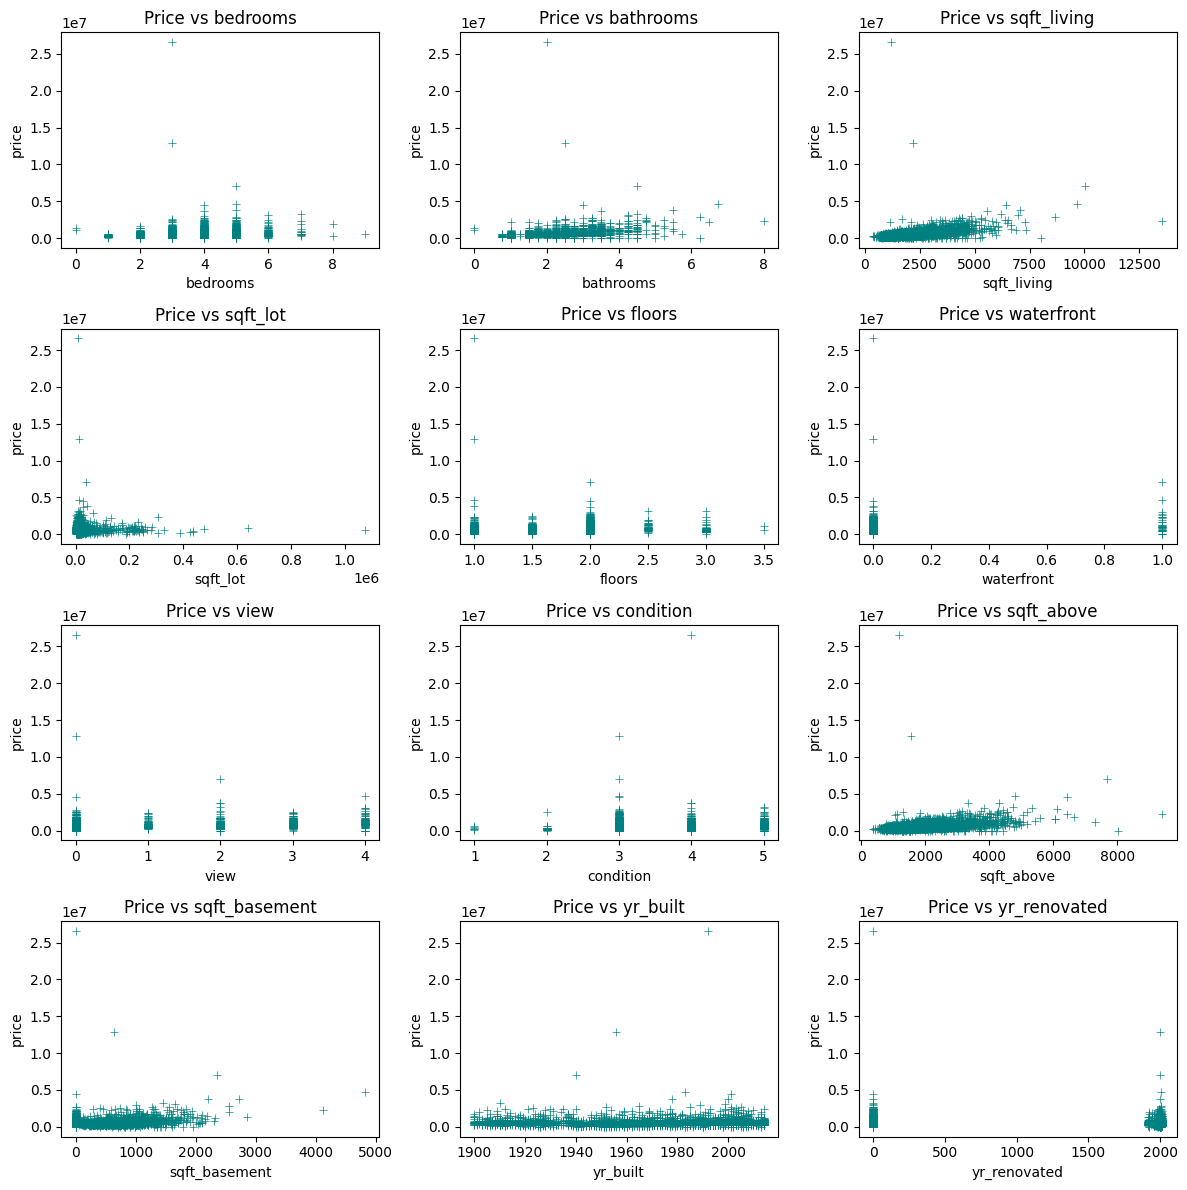

In [18]:
plt.figure(figsize=(12, 12))
for i, feature in enumerate(dataset.columns[2:14]):
    if dataset[feature].dtype != 'object':
        plt.subplot(4, 3, i + 1)
        sns.scatterplot(x=dataset[feature], y=dataset['price'], marker='+', color='teal')
        plt.title(f'Price vs {feature}')
plt.tight_layout()
plt.show()

In [19]:
dataset.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [20]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset[features] = scaler.fit_transform(dataset[features])

dummies = ['city','country']
encoded_city = pd.get_dummies(dataset[dummies], prefix=dummies)
dataset = pd.concat([dataset, encoded_city], axis=1)

dataset.drop(["date"], axis = 1, inplace = True)

In [21]:
dataset[features].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670
1,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693
2,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693
3,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693
4,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396


In [22]:
X = dataset[features]
X.columns = X.columns.astype(str)

In [23]:
y = dataset.price

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True)

In [25]:
m = X_train.shape[0] 
n = X_train.shape[1] 

w = np.zeros(n)
b = 0

x = X_train.T.values

f = np.dot(w, x) + b

In [26]:
def compute_cost(f, y):
    m = len(y) 
    cost = (1/ (2 * m)) * np.sum((f - y) ** 2)
    return cost

In [27]:
alpha = 1e-3
ε = 1e-6
prev_cost = float('inf') 
cost = compute_cost(f, y_train.values)

cost_history = []
iterations = 0

count = 0
while abs(prev_cost - cost) > ε:
    prev_cost = cost
    
    gradient_w = (1 / m) * np.dot(x, (f - y_train.values)) 
    gradient_b = (1 / m) * np.sum(f - y_train.values)  
    
    w -= alpha * gradient_w
    b -= alpha * gradient_b

    f = np.dot(w, x) + b
    cost = compute_cost(f, y_train.values)
    
    cost_history.append(cost)
    iterations += 1

In [28]:
y_pred = np.dot(w, X_test.T.values) + b

mse_test = np.mean((y_pred - y_test) ** 2)  
rmse_test = np.sqrt(mse_test)  
r2_score_test = 1 - np.sum((y_pred - y_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)  

print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)
print("Test R²:", r2_score_test)

Test MSE: 986921744518.1152
Test RMSE: 993439.3512027371
Test R²: 0.03228387873219429


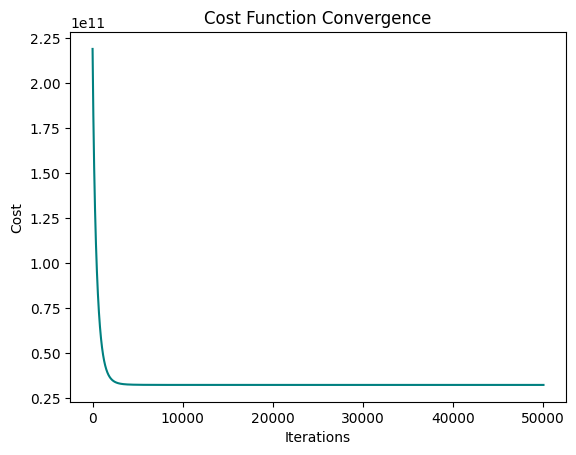

In [29]:
sns.lineplot(x=range(iterations), y=cost_history, color='teal')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,root_mean_squared_error, r2_score
model = LinearRegression()
reg = model.fit(X_train, y_train)
pred = reg.predict(X_test)

print("Test MSE:", mean_squared_error(y_true=y_test, y_pred=pred))
print("Test RMSE:", root_mean_squared_error(y_true=y_test, y_pred=pred))
print("Test R²:", r2_score(y_true=y_test, y_pred=pred))

Test MSE: 987109541990.04
Test RMSE: 993533.865547642
Test R²: 0.032099735823068465
